In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split


2023-02-15 22:29:55.701772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-15 22:29:55.829933: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-15 22:29:55.833185: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-15 22:29:55.833200: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
# hand_ds = tf.data.experimental.make_csv_dataset(
#     'data.csv',
#     batch_size=5, # Artificially small to make examples easier to show.
#     label_name='label',
#     num_epochs=1,
#     ignore_errors=True,)
data_x = np.loadtxt("data.csv", delimiter=",", dtype=float, usecols=list(range(1, (21 * 2) + 1)))
data_y = np.loadtxt("data.csv", delimiter=",", dtype=float, usecols=(0))
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, train_size=0.75, random_state=69)

print(train_x.shape)

(267, 42)


In [3]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input((42,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2752      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


2023-02-15 22:29:57.957729: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-15 22:29:57.958199: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-15 22:29:57.958249: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-15 22:29:57.958279: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-15 22:29:57.958311: W tensorflow/c

In [4]:
history = model.fit(x=train_x,y=train_y,batch_size=5,shuffle=True,epochs=20)

Epoch 1/20
54/54 [==============================] - 1s 2ms/step - loss: 0.5779
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.3885
Epoch 3/20
54/54 [==============================] - 0s 2ms/step - loss: 0.2154
Epoch 4/20
54/54 [==============================] - 0s 3ms/step - loss: 0.1325
Epoch 5/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0787
Epoch 6/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 7/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 8/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 9/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 10/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0473
Epoch 11/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 12/20
54/54 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 13/20
54/54 [==============================

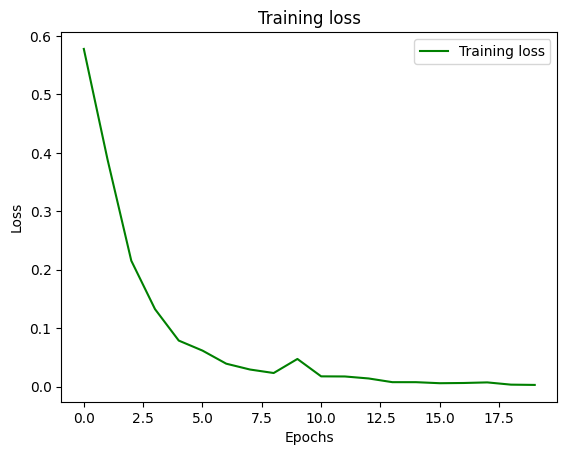

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
model.save("models/v1.h5")